# Центральная предельная теорема

## Распределение Парето  -
https://ru.wikipedia.org/wiki/Распределение_Парето

### Распределние для случайной величины $X$: 

$F_{X}(x)=P(X<x)=1-\left({\frac {x_{m}}{x}}\right)^{ b},\;\forall x\geq x_{m}$, 

где $x_{m}, b > 0$

### Плотность:

$f_{X}(x)=\left\{{\begin{matrix}{\frac {bx_{m}^{b}}{x^{b+1}}}; x\geq x_{m}\\0; x<x_{m}\end{matrix}}\right..$

### Мат. ожидание:

${\displaystyle \mathbb {E} [X]={\frac {bx_{m}}{b-1}},}$

### Дисперсия:
${\displaystyle \mathrm {D} [X]=\left({\frac {x_{m}}{b-1}}\right)^{2}{\frac {b}{b-2}}.}$

In [3]:
% matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [23]:
# Распределение Парето с параметром b = 3
pareto = sts.pareto(b=3)

# выборка (random variates) объемом 1000
rv = pareto.rvs(size=1000)

In [47]:
# теоретическая плотность распределения (probability density function)
x = np.linspace(1, 6, 1000)
pdf = pareto.pdf(x) 

Text(0,0.5,'$f(x)$')

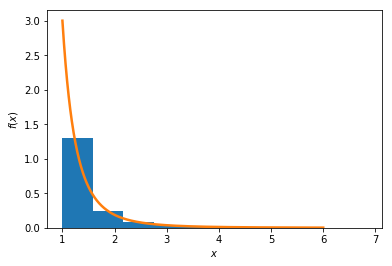

In [48]:
plt.hist(rv, density=True)
plt.plot(x, pdf, linewidth = 2.5)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

#### Параметры нормального распределения, которое должно приближать исходное:

$x_{m}$ = 1, $b$ = 3

По формулам (https://ru.wikipedia.org/wiki/Распределение_Парето):

$\mu$ = ${\displaystyle \mathbb {E} [X]={\frac {bx_{m}}{b-1}}}$ = $\frac{3}{2} = {1.5}$

$\sigma$ = ${\displaystyle \sqrt{{\frac {\mathrm {D} [X]}{n}}}=\sqrt{{\frac {1}{n}}\left({\frac {x_{m}}{b-1}}\right)^{2}{\frac {b}{b-2}}}} = {\frac{0.75}{n}}$

In [164]:
def gen_pdf(n):
    # создаём 1000 выборок объема n
    hist = []
    for i in range(1000):
        hist.append(np.mean(pareto.rvs(n)))
    
    # нормальное распределение, приближающее исходное
    mu = 1.5
    sigma = (0.75 * (1. / n)) ** 0.5
    norm = sts.norm(mu, sigma)
    x = np.linspace(0, 5, 500)
    norm_pdf = norm.pdf(x)
    
        
    # гистограмма выборочных средних и график нормального распределения
    plt.hist(hist, density=True)
    plt.plot(x, norm_pdf, linewidth = 2.5)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = ' + str(n))
    plt.show()

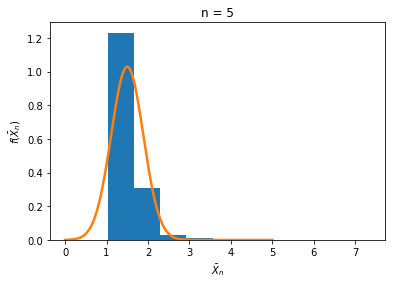

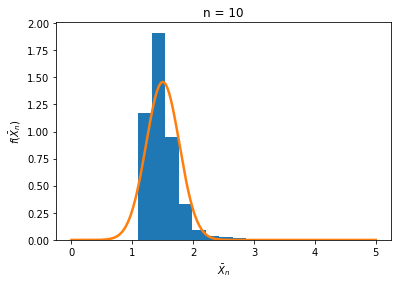

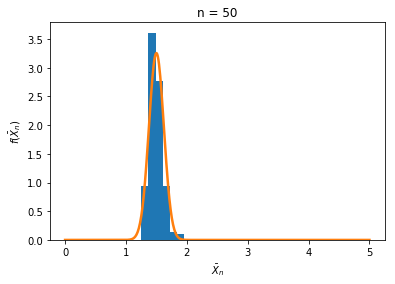

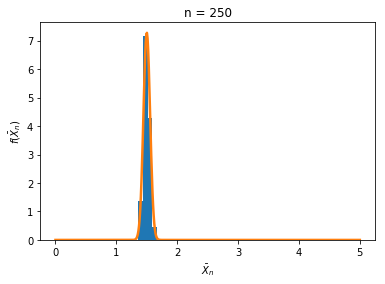

In [165]:
for i in [5, 10, 50, 250]:
    gen_pdf(i)

## Вывод
При увеличении n возрастает точность аппроксимации распределения выборочных средних нормальным распределнием.

При n = 50 аппроксимация уже довольно хорошая. 

При увеличении n уменьшается стандартное отклонение.

На примере распределения Парето проверена центральная предельная теорема.